# Pattern Recognition Assignment I

# Problem Statement

Heart failure is a critical condition often caused by cardiovascular diseases (CVDs). Early
prediction of heart failure can aid in timely medical intervention and improve patient outcomes.
In this assignment, you will build classifiers to predict whether a patient is at risk of heart failure
based on clinical features. The data set for this task is the Heart Failure Prediction dataset
(918 samples, 11 features, 2 classes) available on Kaggle – it includes various patient attributes
(e.g. age, blood pressure, cholesterol levels, etc.) and a binary label indicating the occurrence
of heart failure. This assignment aims to familiarize you with several classical classification
methods and their performance on a real-world medical dataset. You will implement certain
algorithms from scratch and utilize library implementations for others. Through this process,
you will learn how different classifiers work, how to evaluate them, and how to analyze their
results.

## Data Preparation

### Import dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

### Read Dataset

In [2]:
df = pd.read_csv('./dataset.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Seperate the features and target class

In [3]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


### Categorical features encoding with `hot encoding`

- Get the categorical features

In [4]:
cat_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
X[cat_features].head()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,0,Normal,N,Up
1,F,NAP,0,Normal,N,Flat
2,M,ATA,0,ST,N,Up
3,F,ASY,0,Normal,Y,Flat
4,M,NAP,0,Normal,N,Up


- **Hot Encoding**

In [5]:
from sklearn.preprocessing import OneHotEncoder

In [6]:
encoder = OneHotEncoder(sparse_output=False)
x_encoded = encoder.fit_transform(X[cat_features])

# Convert to DataFrame
x_encoded_df = pd.DataFrame(x_encoded, columns=encoder.get_feature_names_out(cat_features), index=X.index)

# Drop original categorical columns and concatenate encoded data
new_X = pd.concat([X.drop(columns=cat_features), x_encoded_df], axis=1)

In [7]:
new_X.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,156,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,98,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,108,1.5,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,122,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


### Data Visualization

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

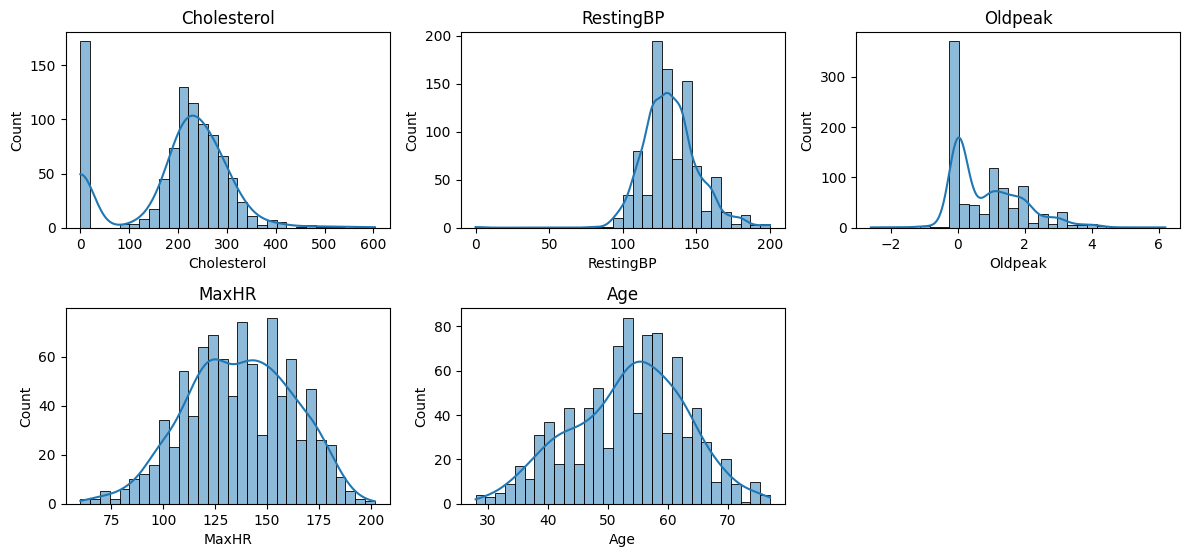

In [9]:
plt.figure(figsize=(12, 8))

for i, feature in enumerate(list(set(X.columns) - set(cat_features)), 1):
    plt.subplot(3, 3, i)
    sns.histplot(new_X[feature], kde=True, bins=30)
    plt.title(feature)

plt.tight_layout()
plt.show()

### Normalization

In [10]:
norm_features = ['Cholesterol', 'Oldpeak']

print(new_X[norm_features].mean())
normalized_X = new_X.copy()
normalized_X[norm_features] = (new_X[norm_features] - new_X[norm_features].mean()) / new_X[norm_features].std()

Cholesterol    198.799564
Oldpeak          0.887364
dtype: float64


- **Data After Normalization**

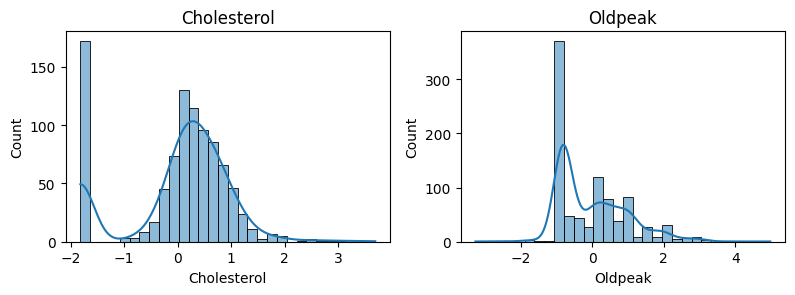

In [11]:
plt.figure(figsize=(12, 8))

for i, feature in enumerate(norm_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(normalized_X[feature], kde=True, bins=30)
    plt.title(feature)

plt.tight_layout()
plt.show()

In [12]:
final_X = new_X.copy()

### Split the data into Training, Validation and test sets

In [13]:
# Split the data into 70% training
x_train, x_temp, y_train, y_temp = train_test_split(final_X, y, test_size=0.3, stratify=y, random_state=42)

# Split the rest 30% into 10% validation and 20% test
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=2/3, stratify=y_temp, random_state=42)

In [14]:
x_train.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
335,62,120,0,134,-0.8,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
368,57,140,0,120,2.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
111,57,150,255,92,3.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
336,72,160,0,114,1.6,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
479,56,170,0,123,2.5,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [15]:
x_val.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
475,59,178,0,120,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
316,57,105,0,148,0.3,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
798,42,102,265,122,0.6,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
234,54,140,309,140,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
21,44,120,184,142,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [16]:
x_test.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
652,59,160,273,125,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
117,59,130,338,130,1.5,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
800,43,130,315,162,1.9,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
274,45,180,295,180,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
669,45,130,234,175,0.6,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Decision Tree

Max Depth: 3, Train Accuracy: 0.8473520249221184, Validation Accuracy: 0.8695652173913043, Test Accuracy: 0.8369565217391305
Max Depth: 5, Train Accuracy: 0.881619937694704, Validation Accuracy: 0.8695652173913043, Test Accuracy: 0.8260869565217391
Max Depth: 7, Train Accuracy: 0.9314641744548287, Validation Accuracy: 0.8152173913043478, Test Accuracy: 0.7717391304347826
Max Depth: 9, Train Accuracy: 0.9517133956386293, Validation Accuracy: 0.8043478260869565, Test Accuracy: 0.7663043478260869
Max Depth: 11, Train Accuracy: 0.9719626168224299, Validation Accuracy: 0.8260869565217391, Test Accuracy: 0.7445652173913043
Max Depth: 13, Train Accuracy: 0.9828660436137072, Validation Accuracy: 0.8152173913043478, Test Accuracy: 0.75
Max Depth: 15, Train Accuracy: 0.9844236760124611, Validation Accuracy: 0.8152173913043478, Test Accuracy: 0.7445652173913043
Max Depth: 17, Train Accuracy: 0.9844236760124611, Validation Accuracy: 0.8152173913043478, Test Accuracy: 0.7445652173913043
Max Depth: 

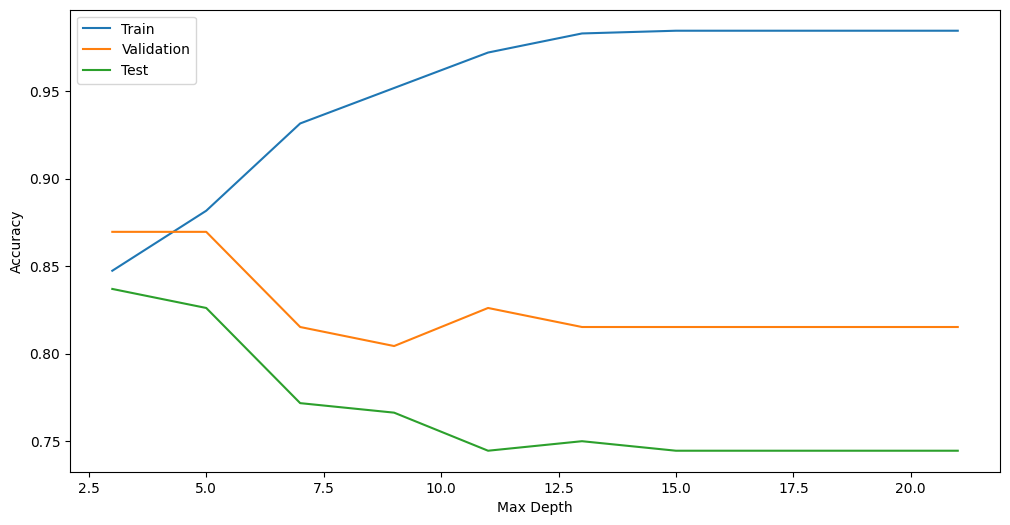

Min Samples Split: 3, Train Accuracy: 0.9735202492211839, Validation Accuracy: 0.8152173913043478, Test Accuracy: 0.7554347826086957
Min Samples Split: 5, Train Accuracy: 0.9610591900311527, Validation Accuracy: 0.8152173913043478, Test Accuracy: 0.7554347826086957
Min Samples Split: 7, Train Accuracy: 0.9439252336448598, Validation Accuracy: 0.8260869565217391, Test Accuracy: 0.7771739130434783
Min Samples Split: 9, Train Accuracy: 0.9392523364485982, Validation Accuracy: 0.8369565217391305, Test Accuracy: 0.7880434782608695
Min Samples Split: 11, Train Accuracy: 0.9330218068535826, Validation Accuracy: 0.8260869565217391, Test Accuracy: 0.7989130434782609
Min Samples Split: 13, Train Accuracy: 0.9314641744548287, Validation Accuracy: 0.8586956521739131, Test Accuracy: 0.7880434782608695
Min Samples Split: 15, Train Accuracy: 0.9174454828660437, Validation Accuracy: 0.8586956521739131, Test Accuracy: 0.7989130434782609
Min Samples Split: 17, Train Accuracy: 0.9080996884735203, Validat

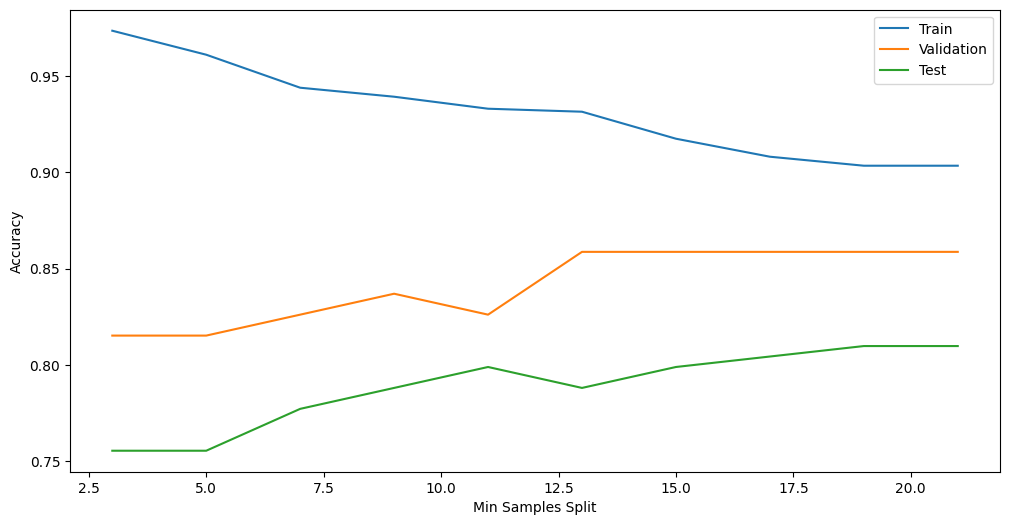

Max Depth: 3, Train Accuracy: 0.8473520249221184, Validation Accuracy: 0.8695652173913043, Test Accuracy: 0.8369565217391305
Max Depth: 5, Train Accuracy: 0.8644859813084113, Validation Accuracy: 0.8695652173913043, Test Accuracy: 0.842391304347826
Max Depth: 7, Train Accuracy: 0.8940809968847352, Validation Accuracy: 0.8586956521739131, Test Accuracy: 0.8043478260869565
Max Depth: 9, Train Accuracy: 0.8987538940809969, Validation Accuracy: 0.8586956521739131, Test Accuracy: 0.8097826086956522
Max Depth: 11, Train Accuracy: 0.9034267912772586, Validation Accuracy: 0.8586956521739131, Test Accuracy: 0.8097826086956522
Max Depth: 13, Train Accuracy: 0.9034267912772586, Validation Accuracy: 0.8586956521739131, Test Accuracy: 0.8097826086956522
Max Depth: 15, Train Accuracy: 0.9034267912772586, Validation Accuracy: 0.8586956521739131, Test Accuracy: 0.8097826086956522
Max Depth: 17, Train Accuracy: 0.9034267912772586, Validation Accuracy: 0.8586956521739131, Test Accuracy: 0.80978260869565

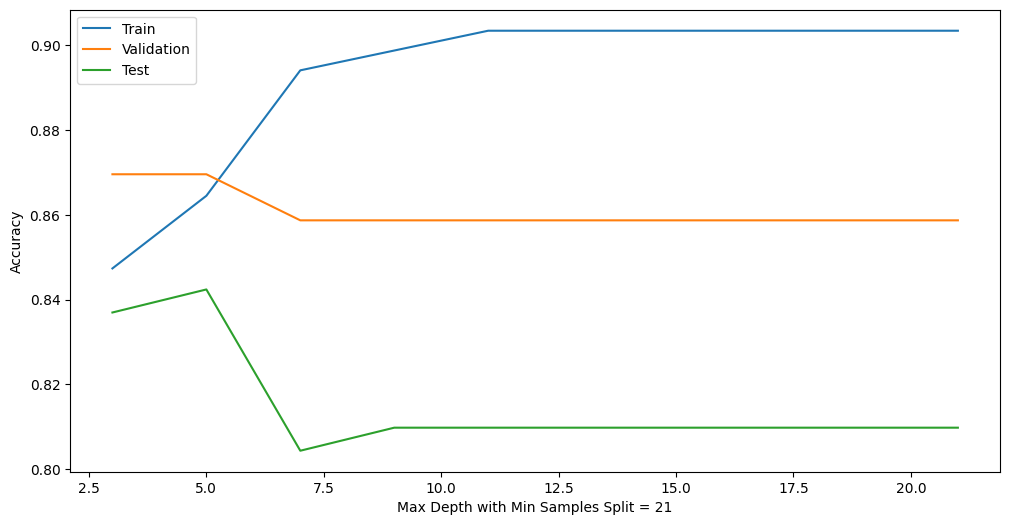

In [25]:
from decision_trees import DecisionTree

max_depth = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
train_acc = []
val_acc = []
test_acc = []

for depth in max_depth:
    tree = DecisionTree(max_depth=depth)
    tree.fit(x_train.to_numpy(), y_train.to_numpy())
    train_acc.append(tree.accuracy(tree.predict(x_train.to_numpy()), y_train.to_numpy()))
    val_acc.append(tree.accuracy(tree.predict(x_val.to_numpy()), y_val.to_numpy()))
    test_acc.append(tree.accuracy(tree.predict(x_test.to_numpy()), y_test.to_numpy()))
    print(f"Max Depth: {depth}, Train Accuracy: {train_acc[-1]}, Validation Accuracy: {val_acc[-1]}, Test Accuracy: {test_acc[-1]}")


plt.figure(figsize=(12, 6))
plt.plot(max_depth, train_acc, label='Train')
plt.plot(max_depth, val_acc, label='Validation')
plt.plot(max_depth, test_acc, label='Test')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

min_samples_split = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
train_acc2 = []
val_acc2 = []
test_acc2 = []

for samples in min_samples_split:
    tree = DecisionTree(min_samples_split=samples)
    tree.fit(x_train.to_numpy(), y_train.to_numpy())
    train_acc2.append(tree.accuracy(tree.predict(x_train.to_numpy()), y_train.to_numpy()))
    val_acc2.append(tree.accuracy(tree.predict(x_val.to_numpy()), y_val.to_numpy()))
    test_acc2.append(tree.accuracy(tree.predict(x_test.to_numpy()), y_test.to_numpy()))
    print(f"Min Samples Split: {samples}, Train Accuracy: {train_acc2[-1]}, Validation Accuracy: {val_acc2[-1]}, Test Accuracy: {test_acc2[-1]}")

plt.figure(figsize=(12, 6))
plt.plot(min_samples_split, train_acc2, label='Train') 
plt.plot(min_samples_split, val_acc2, label='Validation')
plt.plot(min_samples_split, test_acc2, label='Test')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

train_acc3 = []
val_acc3 = []
test_acc3 = []

## trying min samples split = 21
for depth in max_depth:
    tree = DecisionTree(max_depth=depth, min_samples_split=21)
    tree.fit(x_train.to_numpy(), y_train.to_numpy())
    train_acc3.append(tree.accuracy(tree.predict(x_train.to_numpy()), y_train.to_numpy()))
    val_acc3.append(tree.accuracy(tree.predict(x_val.to_numpy()), y_val.to_numpy()))
    test_acc3.append(tree.accuracy(tree.predict(x_test.to_numpy()), y_test.to_numpy()))
    print(f"Max Depth: {depth}, Train Accuracy: {train_acc3[-1]}, Validation Accuracy: {val_acc3[-1]}, Test Accuracy: {test_acc3[-1]}")

plt.figure(figsize=(12, 6))
plt.plot(max_depth, train_acc3, label='Train')  
plt.plot(max_depth, val_acc3, label='Validation')
plt.plot(max_depth, test_acc3, label='Test')
plt.xlabel('Max Depth with Min Samples Split = 21')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




### Further Hyperparameter Tuning

Max Depth: 3, Min Samples Split: 2, Train Acc: 0.8474, Val Acc: 0.8696, Test Acc: 0.8370
Max Depth: 3, Min Samples Split: 5, Train Acc: 0.8474, Val Acc: 0.8696, Test Acc: 0.8370
Max Depth: 3, Min Samples Split: 10, Train Acc: 0.8474, Val Acc: 0.8696, Test Acc: 0.8370
Max Depth: 3, Min Samples Split: 15, Train Acc: 0.8474, Val Acc: 0.8696, Test Acc: 0.8370
Max Depth: 3, Min Samples Split: 20, Train Acc: 0.8474, Val Acc: 0.8696, Test Acc: 0.8370
Max Depth: 3, Min Samples Split: 30, Train Acc: 0.8474, Val Acc: 0.8696, Test Acc: 0.8370
Max Depth: 5, Min Samples Split: 2, Train Acc: 0.8816, Val Acc: 0.8696, Test Acc: 0.8261
Max Depth: 5, Min Samples Split: 5, Train Acc: 0.8816, Val Acc: 0.8696, Test Acc: 0.8261
Max Depth: 5, Min Samples Split: 10, Train Acc: 0.8816, Val Acc: 0.8696, Test Acc: 0.8261
Max Depth: 5, Min Samples Split: 15, Train Acc: 0.8692, Val Acc: 0.8696, Test Acc: 0.8370
Max Depth: 5, Min Samples Split: 20, Train Acc: 0.8645, Val Acc: 0.8696, Test Acc: 0.8424
Max Depth: 5, 

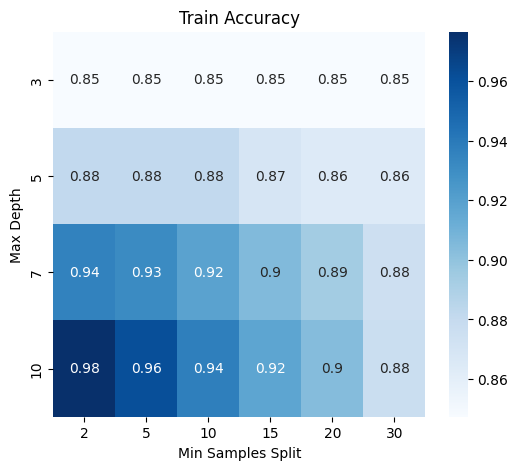

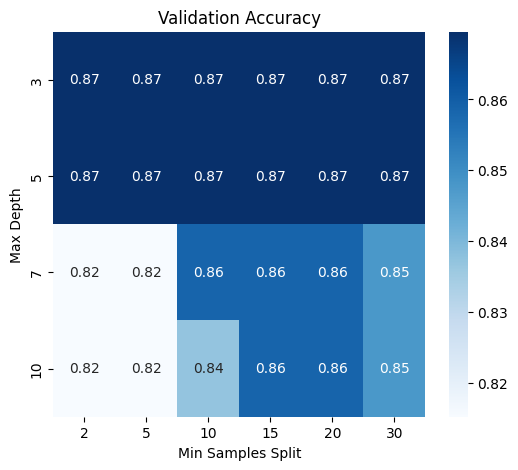

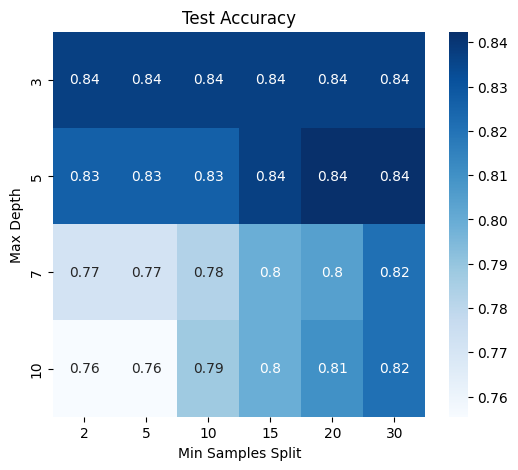

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


max_depth_values = [3, 5, 7, 10]  
min_samples_split_values = [2, 5, 10, 15, 20, 30]

train_acc_matrix = np.zeros((len(max_depth_values), len(min_samples_split_values)))
val_acc_matrix = np.zeros((len(max_depth_values), len(min_samples_split_values)))
test_acc_matrix = np.zeros((len(max_depth_values), len(min_samples_split_values)))


for i, depth in enumerate(max_depth_values):
    for j, samples in enumerate(min_samples_split_values):
        tree = DecisionTree(max_depth=depth, min_samples_split=samples)
        tree.fit(x_train.to_numpy(), y_train.to_numpy())
        
        train_acc_matrix[i, j] = tree.accuracy(tree.predict(x_train.to_numpy()), y_train.to_numpy())
        val_acc_matrix[i, j] = tree.accuracy(tree.predict(x_val.to_numpy()), y_val.to_numpy())
        test_acc_matrix[i, j] = tree.accuracy(tree.predict(x_test.to_numpy()), y_test.to_numpy())

        print(f"Max Depth: {depth}, Min Samples Split: {samples}, Train Acc: {train_acc_matrix[i, j]:.4f}, Val Acc: {val_acc_matrix[i, j]:.4f}, Test Acc: {test_acc_matrix[i, j]:.4f}")


def plot_heatmap(matrix, title, x_labels, y_labels):
    plt.figure(figsize=(6, 5))
    sns.heatmap(matrix, annot=True, cmap="Blues", xticklabels=x_labels, yticklabels=y_labels)
    plt.xlabel("Min Samples Split")
    plt.ylabel("Max Depth")
    plt.title(title)
    plt.show()


plot_heatmap(train_acc_matrix, "Train Accuracy", min_samples_split_values, max_depth_values)
plot_heatmap(val_acc_matrix, "Validation Accuracy", min_samples_split_values, max_depth_values)
plot_heatmap(test_acc_matrix, "Test Accuracy", min_samples_split_values, max_depth_values)


### Evaluation of Decision Trees

Training Time: 0.6271 seconds
Prediction Time: 0.0017 seconds
Test Accuracy: 0.842391304347826
F1 Score: 0.8427
Confusion Matrix:
[[70 12]
 [17 85]]


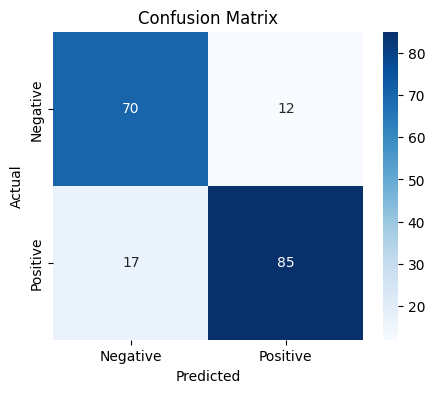

In [30]:
from decision_trees import DecisionTree
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time

#  Best parameters
tree = DecisionTree(max_depth=5, min_samples_split=21)
start_time = time.time()
tree.fit(x_train.to_numpy(), y_train.to_numpy())
training_time = time.time() - start_time

start_time = time.time()
test_pred = tree.predict(x_test.to_numpy())
prediction_time = time.time() - start_time
test_acc = tree.accuracy(test_pred, y_test.to_numpy())

print(f"Training Time: {training_time:.4f} seconds")
print(f"Prediction Time: {prediction_time:.4f} seconds")

print(f"Test Accuracy: {test_acc}")

f1 = f1_score(y_test, test_pred, average='weighted')  
print(f"F1 Score: {f1:.4f}")
cm = confusion_matrix(y_test, test_pred)

print("Confusion Matrix:")
print(cm)



plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# print(classification_report(y_test, test_pred))


## Bonus

### Feedforward Nueral Network

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_shape = x_train.shape[1]


hidden_neurons = [16, 32, 64]
learning_rates = [0.0005, 0.001, 0.005]
epochs_values = [50, 100, 150]

best_val_acc = 0
best_hyperparams = {}

for neurons in hidden_neurons:
    for lr in learning_rates:
        for epochs in epochs_values:
            # Define the FNN model
            model = keras.Sequential([
                layers.Dense(neurons, activation='relu', input_shape=(input_shape,)),
                layers.Dense(1, activation='sigmoid')
            ])

            # Compile the model
            model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
                            loss='binary_crossentropy',
                            metrics=['accuracy'])

            # Train the model
            model.fit(x_train, y_train, epochs=epochs, batch_size=32, validation_data=(x_val, y_val), verbose=0)

            # Evaluate the model
            val_loss, val_acc = model.evaluate(x_val, y_val, verbose=0)
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_hyperparams = {'neurons': neurons, 'learning_rate': lr, 'epochs': epochs}

# Train final model with best hyperparameters
model = keras.Sequential([
    layers.Dense(best_hyperparams['neurons'], activation='relu', input_shape=(input_shape,)),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=best_hyperparams['learning_rate']),
                loss='binary_crossentropy',
                metrics=['accuracy'])

model.fit(x_train, y_train, epochs=best_hyperparams['epochs'], batch_size=32, validation_data=(x_val, y_val))

# Evaluate the final model
val_loss, val_acc = model.evaluate(x_val, y_val)
print(f'Best Hyperparameters: {best_hyperparams}')
print(f'Validation Accuracy: {val_acc:.4f}')



2025-03-12 03:41:12.325504: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-12 03:41:12.328508: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-12 03:41:12.336123: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741743672.351876  174015 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741743672.356582  174015 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-12 03:41:12.373177: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

KeyboardInterrupt: 

## KNN 

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

best_k = 1
best_score = 0
k_list = [1, 3, 5, 11, 12, 15, 21, 25]

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    val_score = knn.score(x_val, y_val)
    
    if val_score > best_score:
        best_score = val_score
        best_k = k

# Train final model with best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

# Evaluate on test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Best k: {best_k}, Test Accuracy: {accuracy:.4f}")


Best k: 5, Test Accuracy: 0.6848
